In [1]:
import csv
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import imageio
import math


import sys
sys.path.append('/home/derek/jpl_ws/src/navlab_turtlebot/navlab_turtlebot_frs/src')
from zonotope import Zonotope
from probzonotope import probZonotope

%load_ext autoreload
%autoreload 2

# Visualization

In [444]:
prefix = "./paper10/"

calodom0 = np.loadtxt(prefix+"calodom0.csv", delimiter=",")
calodom0 = np.delete(calodom0, [182*2,182*2+1,551*2,551*2+1], axis=0) # paper10
display(calodom0.shape)

calodom1 = np.loadtxt(prefix+"calodom1.csv", delimiter=",")
calodom1 = np.delete(calodom1, [182*2,182*2+1,551*2,551*2+1], axis=0) # paper10
display(calodom1.shape)

caltraj = np.loadtxt(prefix+"caltraj.csv", delimiter=",")
display(caltraj.shape)

calsplit = np.loadtxt(prefix+"calsplit.txt", delimiter=",")
if calsplit.shape == ():
    calsplit = calsplit.reshape(1,)
display(calsplit.shape)

deets = np.loadtxt(prefix+"simdeets.csv", delimiter=",")
deets = np.delete(deets, [314*3,314*3+1,314*3+2], axis=0) # paper10
display(deets.shape)

first = np.loadtxt(prefix+"happyfrsfirst.csv", delimiter=",")
display(first.shape)

second = np.loadtxt(prefix+"happyfrssecond.csv", delimiter=",")
display(second.shape)

third = np.loadtxt(prefix+"happyfrsthird.csv", delimiter=",")
display(third.shape)

(1398, 1200)

(1398, 1200)

(1398, 400)

(699,)

(2097, 6)

(280299, 11)

(68881, 15)

(699, 11)

0
(-3.7831572741901507, -1.7987095799195547)
1
(-4.558470571273643, 0.14875122838714994)
2
(-2.3743333314083275, 0.9812384837914307)
start (-2.3273031407818774, -1.6983819280535477)
goal (-2.642061830999704, -1.3853826492059051)
start (-1.4703213458184115, -0.5330003414000735)
goal (-3.654743072659541, -2.3649692324850107)


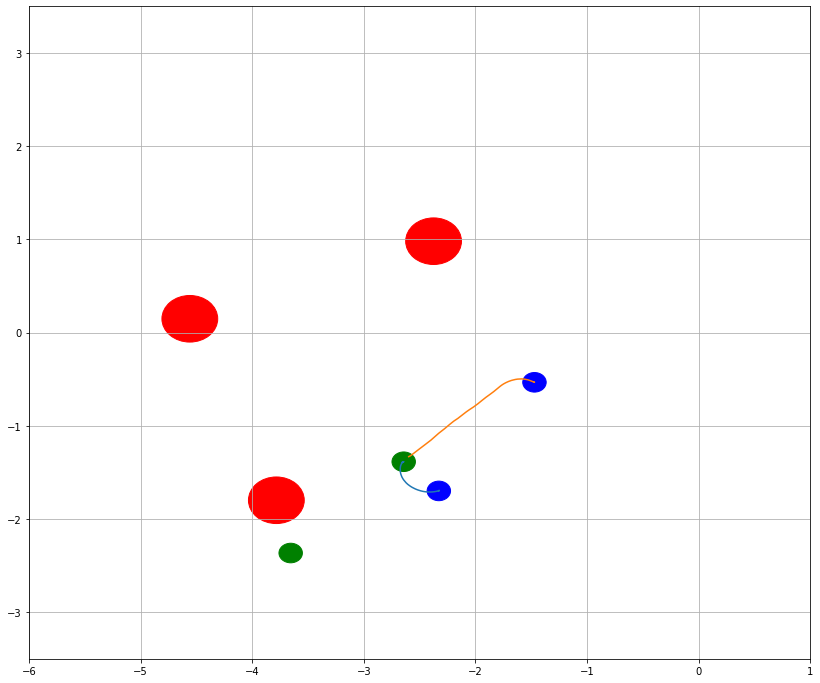

In [454]:
# [ 27,  73,  84,  96, 189, 223, 349, 357, 359, 396, 407, 446, 485, 492]
sim = 96
n_obs = 3

fig, ax = plt.subplots(figsize=(14,12))
ax.set_xlim((-6, 1))
ax.set_ylim((-3.5, 3.5))
ax.grid()

# Plot the odometry
ind0 = np.where(calodom0[sim*2,:]!=0)
ind1 = np.where(calodom1[sim*2,:]!=0)
plt.plot(calodom0[sim*2,:ind0[0][-1]],calodom0[sim*2+1,:ind0[0][-1]])
plt.plot(calodom1[sim*2,:ind1[0][-1]],calodom1[sim*2+1,:ind1[0][-1]])

# Plot one predicted trajectory
ind = np.where(caltraj[sim*2,:]!=0)
#plt.plot(caltraj[sim*2,:ind[0][-1]],caltraj[sim*2+1,:ind[0][-1]])

# Plot the obstacles
for obs in range(n_obs):
    ax.add_patch(plt.Circle((deets[sim*3+2,obs*2],deets[sim*3+2,obs*2+1]), .25, color='r'))
    print(obs)
    print((deets[sim*3+2,obs*2],deets[sim*3+2,obs*2+1]))
ax.add_patch(plt.Circle((deets[sim*3,0],deets[sim*3,1]), .105, color='b'))
print("start",(deets[sim*3,0],deets[sim*3,1]))
ax.add_patch(plt.Circle((deets[sim*3,3],deets[sim*3,4]), .105, color='g'))
print("goal",(deets[sim*3,3],deets[sim*3,4]))

# Plot the start and goal positions
ax.add_patch(plt.Circle((deets[sim*3+1,0],deets[sim*3+1,1]), .105, color='b'))
print("start",(deets[sim*3+1,0],deets[sim*3+1,1]))
ax.add_patch(plt.Circle((deets[sim*3+1,3],deets[sim*3+1,4]), .105, color='g'))
print("goal",(deets[sim*3+1,3],deets[sim*3+1,4]))

# Plot the FRS
"""
simends = np.where(np.sum(first,axis=1)==0)
if sim == 0:
    current = first[:simends[0][sim]]
else:
    current = first[simends[0][sim-1]:simends[0][sim]]
for i, line in enumerate(current):
    if i % 20 == 0:
        z = Zonotope(np.array(line[1:3]).reshape((2,1)),np.array(line[3:]).reshape((4,2)).T)
        z.plot(ax,alpha=.01)
        """
"""
simends2 = np.where(np.sum(second,axis=1)==0)
print(second.shape)
print(simends2)
if sim == 0:
    current2 = second[:simends2[0][sim]]
else:
    current2 = second[simends2[0][sim-1]+1:simends2[0][sim]]
print(calsplit[sim])
start = current2[0,0]
#print(current2[:,0])
#print(" ")
for i, line in enumerate(current2[:10]):
    if i%5 == 0:
        t_sim = line[0]-start
        p = .1
        weight = 1 - .94**(t_sim+1) - .05**(t_sim/3+1)
        z = probZonotope(np.array(line[1:3]).reshape((2,1)),np.array(line[3:11]).reshape((4,2)).T,np.array(line[11:]).reshape((2,2)))
        #print(p,weight,p*weight)
        z = z.get_zono(p*(1-weight))
        if i >= calsplit[sim]:
            z.plot(ax,color="red",alpha=.01)
        else:
            z.plot(ax,color="blue",alpha=.01)
           
        z = probZonotope(np.array(third[sim][1:3]).reshape((2,1)),np.array(third[sim][3:7]).reshape((2,2)).T,np.array(third[sim][7:]).reshape((2,2)))
        z = z.get_zono(p*weight)
        #print(p*weight)
        #print(z)
        if i >= calsplit[sim]:
            z.plot(ax,color="red",alpha=.01)
        else:
            z.plot(ax,color="blue",alpha=.01)
"""

plt.show()

In [104]:
def gen_frame(j):
    # Visualize setup
    sim = 5
    n_obs = 3

    fig, ax = plt.subplots(figsize=(14,12))
    ax.set_xlim((-6, 1))
    ax.set_ylim((-3.5, 3.5))
    ax.grid()

    # Plot the odometry
    ax.add_patch(plt.Circle((calodom0[sim*2,j],calodom0[sim*2+1,j]), .105, color='black'))
    ax.add_patch(plt.Circle((calodom1[sim*2,j],calodom1[sim*2+1,j]), .105, color='black'))

    # Plot one predicted trajectory
    ind = np.where(caltraj[sim*2,:]!=0)
    plt.plot(caltraj[sim*2,:ind[0][-1]],caltraj[sim*2+1,:ind[0][-1]])

    # Plot the obstacles
    for obs in range(n_obs):
        ax.add_patch(plt.Circle((deets[sim*3+2,obs*2],deets[sim*3+2,obs*2+1]), .25, color='r'))
    ax.add_patch(plt.Circle((deets[sim*3,0],deets[sim*3,1]), .105, color='b'))
    ax.add_patch(plt.Circle((deets[sim*3,3],deets[sim*3,4]), .105, color='g'))

    # Plot the start and goal positions
    ax.add_patch(plt.Circle((deets[sim*3+1,0],deets[sim*3+1,1]), .105, color='b'))
    ax.add_patch(plt.Circle((deets[sim*3+1,3],deets[sim*3+1,4]), .105, color='g'))

    """
    # Plot the FRS
    simends = np.where(np.sum(first,axis=1)==0)
    if sim == 0:
        current = first[:simends[0][sim]]
    else:
        current = first[simends[0][sim-1]:simends[0][sim]]
    line = current[round(j/3)]
    z = Zonotope(np.array(line[1:3]).reshape((2,1)),np.array(line[3:]).reshape((4,2)).T)
    z.plot(ax,alpha=.05)"""
        
    """
    simends2 = np.where(np.sum(second,axis=1)==0)
    if sim == 0:
        current2 = second[:simends2[0][sim]]
    else:
        current2 = second[simends2[0][sim-1]+1:simends2[0][sim]]
    start = current2[0,0]
    if round(j/3) < len(current2):
        line = current2[round(j/3)]
    else:
        line = current2[-1]
    t_sim = line[0]-start
    p = .9
    weight = 1 - .94**(t_sim+1) - .05**(t_sim/3+1)
    z = probZonotope(np.array(line[1:3]).reshape((2,1)),np.array(line[3:11]).reshape((4,2)).T,np.array(line[11:]).reshape((2,2)))
    z = z.get_zono(p*(1-weight))
    if False: #j >= calsplit[sim]:
        z.plot(ax,color="red",alpha=.05)
    else:
        z.plot(ax,color="blue",alpha=.05)
      
    if round(j/3)+50 < len(current2):
        line = current2[round(j/3)+50]
        t_sim = line[0]-start
        z = probZonotope(np.array(line[1:3]).reshape((2,1)),np.array(line[3:11]).reshape((4,2)).T,np.array(line[11:]).reshape((2,2)))
        z = z.get_zono(p*(1-weight))
        if False: #j >= calsplit[sim]:
            z.plot(ax,color="red",alpha=.05)
        else:
            z.plot(ax,color="blue",alpha=.05)

    z = probZonotope(np.array(third[sim][1:3]).reshape((2,1)),np.array(third[sim][3:7]).reshape((2,2)).T,np.array(third[sim][7:]).reshape((2,2)))
    z = z.get_zono(p*weight)
    if False: #j >= calsplit[sim]:
        z.plot(ax,color="red",alpha=.05)
    else:
        z.plot(ax,color="blue",alpha=.05)"""

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
print(np.where(calodom0[0,:]!=0)[0][-1])
imageio.mimsave('./prettyviznewandimprovedcontrol.gif', [gen_frame(j) for j in range(np.where(calodom0[0,:]!=0)[0][-1])], fps=30)

217
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216


# Happy FRS

In [106]:
first = np.loadtxt("happyfrsfirst.csv", delimiter=",")
display(first.shape)

second = np.loadtxt("happyfrssecond.csv", delimiter=",")
display(second.shape)

third = np.loadtxt("happyfrsthird.csv", delimiter=",")
display(third.shape)

(3208, 11)

(576, 15)

(8, 11)

In [316]:
print(second[:,0])

[51.715 51.815 51.915 52.015 52.115 52.215 52.315 52.415 52.515 52.615
 52.715 52.815 52.915 53.015 53.115 53.215 53.315 53.415 53.515 53.615
 53.715 53.815 53.915 54.015 54.115 54.215 54.315 54.415 54.515 54.615
 54.715 54.815 54.915 55.015 55.115 55.215 55.315 55.415 55.515 55.615
 55.715 55.815 55.915 56.015 56.115 56.215 56.315 56.415 56.515 56.615
 56.715 56.815 56.915 57.015 57.115 57.215 57.315 57.415 57.515 57.615
 57.715 57.815 57.915 58.015 58.115 58.215 58.315 58.415 58.515 58.615
 58.715 58.815 58.915 59.015 59.115 59.215 59.315 59.415 59.515 59.615
 59.715 59.815 59.915 60.015 60.115 60.215 60.315 60.415 60.515 60.615
 60.715 60.815 60.915 61.015 61.115 61.215 61.315 61.415 61.515 61.615
 61.715 61.815 61.915 62.015 62.115 62.215 62.315 62.415 62.515 62.615
 62.715]


[[ 2.2   -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.4   -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.2   -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.3   -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.402 -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.301 -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.506 -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]
 [ 2.4   -0.119 -2.469  0.105  0.     0.     0.105  1.     0.     0.
   1.   ]]
[-0.119 -2.469]
[[0.105 0.    1.    0.   ]
 [0.    0.105 0.    1.   ]]


ValueError: operands could not be broadcast together with shapes (11,) (200,200) 

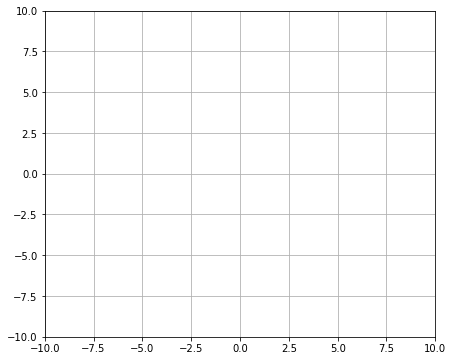

In [122]:
# Visualize setup
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.grid()

ts = third[0]
viz = np.mgrid[-10:10:.1, -10:10:.1]
#print(second[-1,1:3])
#print(np.vstack((second[-1,5:7],second[-1,9:11])))
#no_fault = multivariate_normal(mean=second[-1,1:3], cov=np.eye(2))
print(third)
print(third[0,1:3])
print(third[0,3:].reshape((4,2)).T)
fault = multivariate_normal(mean=third[2,1:3], cov=third[0,7:].reshape((2,2)).T)
#img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) #+ \
#      (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
img = (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1])))
plt.contourf(viz[0],viz[1],img, vmin=0,vmax=.2)
plt.colorbar()
ax.set_title("Fault-based FRS PDF", fontsize=16)

plt.show()

In [253]:
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
print(fault.cdf(np.array([1,1])))
print(fault.cdf(np.array([-1,-1])))
print(fault.cdf(np.array([1,1]))-fault.cdf(np.array([-1,-1])))

[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]
0.717785501764212
0.027138922751031403
0.6906465790131806


In [26]:
def gen_frame(j):
    # Visualize setup
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    ax.grid()

    ts = second[j,0]
    viz = np.mgrid[-5:5:.1, -5:5:.1]
    no_fault = multivariate_normal(mean=second[j,1:3], cov=np.eye(2))
    fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
    img = (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1])))
    plt.contourf(viz[0],viz[1],img,vmin=0,vmax=.15)
    ax.set_title("Intent-based FRS PDF", fontsize=16)
    plt.colorbar()

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
imageio.mimsave('./intentfrs.gif', [gen_frame(j) for j in range(len(second))], fps=20) #len(Ps[:,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]
(100, 100)


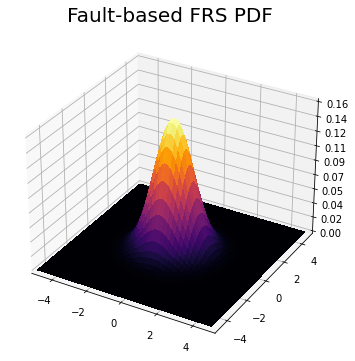

In [291]:
# Visualize setup
fig, ax = plt.subplots(figsize=(7,6),subplot_kw={"projection": "3d"})
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.grid()

ts = third[0]
X = np.arange(-5,5,.1)
Y = np.arange(-5,5,.1)
X, Y = np.meshgrid(X,Y)
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
img = fault.pdf(np.dstack((X, Y)))
print(img.shape)
surf = ax.plot_surface(X,Y,img,cmap=cm.inferno, linewidth=0, antialiased=False)
#plt.contourf(viz[0],viz[1],img, vmin=0,vmax=.2)

ax.set_title("Fault-based FRS PDF", fontsize=20)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

#fig.colorbar(surf,shrink=0.5,aspect=5)

plt.show()

In [321]:
def gen_frame(j):
    # Visualize setup
    fig, ax = plt.subplots(figsize=(7,6),subplot_kw={"projection": "3d"})
    ax.set_xlim((-1, 4))
    ax.set_ylim((-1, 4))
    ax.grid()

    ts = second[j,0]-second[0,0]
    X = np.arange(-1,4,.1)
    Y = np.arange(-1,4,.1)
    X,Y = np.meshgrid(X,Y)
    no_fault = multivariate_normal(mean=second[j,1:3], cov=np.eye(2)*(-.0001*j*(j-len(second))+.001))
    fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))

    
    img = (1-ts*.08) * no_fault.pdf(np.dstack((X, Y))) + (ts * .08) * fault.pdf(np.dstack((X, Y)))
    print(ts*.08)
    
    #img = no_fault.pdf(np.dstack((X, Y)))
    surf = ax.plot_surface(X,Y,img,cmap=cm.inferno,linewidth=0,antialiased=False)
    ax.set_title("Intent-based FRS PDF", fontsize=20)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
imageio.mimsave('./fullfrs3d.gif', [gen_frame(j) for j in range(len(second))], fps=20) #len(Ps[:,0])

0.0
0
0.008000000000000115
1
0.01600000000000023
2
0.02399999999999977
3
0.03199999999999989
4
0.04
5
0.04800000000000011
6
0.05600000000000023
7
0.06399999999999978
8
0.07199999999999988
9
0.08
10
0.08800000000000012
11
0.09600000000000022
12
0.10399999999999977
13
0.11199999999999989
14
0.12
15
0.1280000000000001
16
0.13600000000000023
17
0.14399999999999977
18
0.15199999999999989
19
0.16
20
0.16800000000000012
21
0.17600000000000024
22
0.18399999999999977
23
0.1919999999999999
24
0.2
25
0.20800000000000013
26
0.21600000000000022
27
0.22399999999999978
28
0.2319999999999999
29
0.24
30
0.2480000000000001
31
0.2560000000000002
32
0.2639999999999998
33
0.2719999999999999
34
0.28
35
0.28800000000000014
36
0.2960000000000002
37
0.30399999999999977
38
0.3119999999999999
39
0.32
40
0.3280000000000001
41
0.33600000000000024
42
0.3439999999999998
43
0.35199999999999987
44
0.36
45
0.3680000000000001
46
0.3760000000000002
47
0.3839999999999998
48
0.3919999999999999
49
0.4
50
0.40800000000000014

# Calibration

In [139]:
"""badrows = [0,2,8,9,10,15,26,34,43,44,46,57,61,62,76,88,90,99,104,109,115,117,122,128,141,143,154,162,169,170, \
           190,192,198,201,210,214,216,217,223,235,240,247,249,255,263,265,268,276,281,284,295,303,304,307, \
           312,322,332,341,342,350,358,360,365,369,379,384,401,409,411,415,421,422,431,452,460,461,480,487, \
           498,505,525,526,527,538,539,540,542,546,551,559,561,565,567,568,582,585,587,598,603,605,615,617, \
           619,622,625,631,638,641,644,652,654,660,663,665,671,672,685,697,702,704,705,709,712,721,729,730, \
           746,747,750,764,769,775,778,788,789,791,805,815,822,827,835,837,840,843,846,864,869,875,876,882, \
           886,888,896,905,911,923,928,936,937,939,941,951]"""
badrows = [361,547,806]
print(len(badrows))
dellist = []
for row in badrows:
    dellist.append(row*2)
    dellist.append(row*2+1)

calodom0 = np.loadtxt("./papercal/calodom0.csv", delimiter=",")
calodom0 = np.delete(calodom0, dellist, axis=0)
display(calodom0.shape)

"""badrows = [0,2,8,9,10,15,26,34,43,44,46,57,61,62,76,88,90,99,104,109,115,117,122,128,141,143,154,162,169,170, \
           190,192,198,201,210,214,216,217,223,235,240,247,249,255,263,265,268,276,281,284,295,303,304,307, \
           312,322,332,341,342,350,358,360,365,369,379,384,401,409,411,415,421,422,431,452,460,461,480,487, \
           498,505,525,526,527,538,539,540,542,546,551,559,561,565,567,568,582,585,587,598,603,605,615,617, \
           619,622,625,631,638,641,644,652,654,660,663,665,671,672,685,697,702,704,705,709,712,721,729,730, \
           746,747,750,761,765,770,776,779,789,790,792,806,816,823,828,836,838,841,844,847,865,870,876,877, \
           883,887,889,897,906,912,924,929,937,938,940,942,952]"""
badrows = [361,547,806]
print(len(badrows))
dellist = []
for row in badrows:
    dellist.append(row*2)
    dellist.append(row*2+1)

calodom1 = np.loadtxt("./papercal/calodom1.csv", delimiter=",")
calodom1 = np.delete(calodom1, dellist, axis=0)
display(calodom1.shape)

"""badrows = [6,633]
dellist = []
for row in badrows:
    dellist.append(row*2)
    dellist.append(row*2+1)"""
caltraj = np.loadtxt("./papercal/caltraj.csv", delimiter=",")
#caltraj = np.delete(caltraj, dellist, axis=0)
display(caltraj.shape)

calsplit = np.loadtxt("./papercal/calsplit.txt", delimiter=",")
#calsplit = np.delete(calsplit, badrows, axis=0)
display(calsplit.shape)

"""badrows2 = [0,7,8,9,14,25,33,42,43,45,56,60,61,75,87,89,98,103,108,114,116,121,127,140,142,153,161,168,169,189, \
            191,197,200,209,213,215,216,222,234,239,246,248,254,262,264,267, \
            273,276,281,284,295,303,304,307,312,322,332,341,342,350,358,360, \
            365,366,370,380,385,402,410,412,416,422,423,432,453,461,462,481,488,499,506,526,527,528,539,540,\
            541,543,547,552,560,562,566,568,569,583,586,588,599,604,606,616,618,620,623,626,632,639,642,645,\
            653,655,661,664,666,672,673,686,698,703,705,706,710,713,722,730,731,747,748,751, \
            762,766,771,777,780,790,791,793,807,817,824,829,837,839,842,845,848,866,871,877,878,884,888,890,\
            898,907,913,925,930,938,939,941,943,953]"""
badrows2 = [546]
print(len(badrows2))
dellist = []
for row in badrows2:
    dellist.append(row*3)
    dellist.append(row*3+1)
    dellist.append(row*3+2)
deets = np.loadtxt("./papercal/simdeets.csv", delimiter=",")
deets = np.delete(deets, dellist, axis=0)
display(deets.shape)

3


(2000, 1200)

3


(2000, 1200)

(2000, 400)

(1000,)

1


(3000, 6)

In [140]:
# Identify bad data
n_sims = len(calsplit)
reached = np.zeros((n_sims,))
for sim in range(n_sims):
    goal = deets[sim*3+1,:2]
    reached[sim] = np.sum(np.where(((caltraj[sim*2,:10]-goal[0])**2+(caltraj[sim*2+1,:10]-goal[1])**2)**.5<=.2,1,0))
print("The trajectory start point matches the actual start point "+str(np.sum(np.where(reached>0,1,0)))+" times out of "+str(n_sims)+".")
print("Fraction:",np.sum(np.where(reached>0,1,0))/n_sims)
print(np.where(reached==0))

reached = np.zeros((n_sims,))
for sim in range(n_sims):
    goal = deets[sim*3+1,:2]
    reached[sim] = np.sum(np.where(((calodom1[sim*2,:10]-goal[0])**2+(calodom1[sim*2+1,:10]-goal[1])**2)**.5<=.2,1,0))
print("The odom start point matches the actual start point "+str(np.sum(np.where(reached>0,1,0)))+" times out of "+str(n_sims)+".")
print("Fraction:",np.sum(np.where(reached>0,1,0))/n_sims)
print(np.where(reached==0))

The trajectory start point matches the actual start point 1000 times out of 1000.
Fraction: 1.0
(array([], dtype=int64),)
The odom start point matches the actual start point 1000 times out of 1000.
Fraction: 1.0
(array([], dtype=int64),)


700


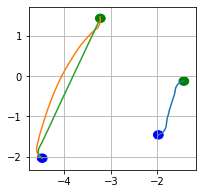

701


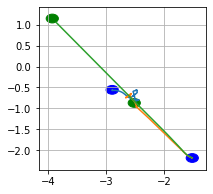

702


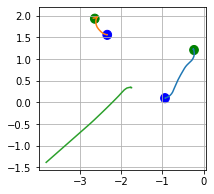

703


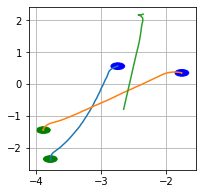

704


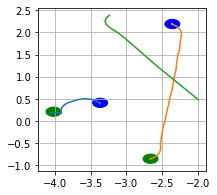

705


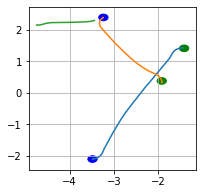

706


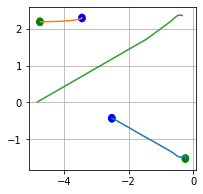

707


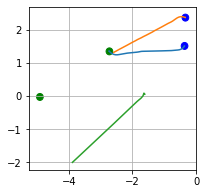

708


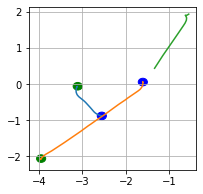

709


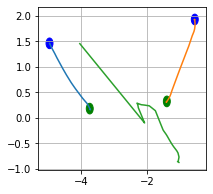

In [913]:
last_sim = 710
n_obs = 3

for sim in range(last_sim-10,last_sim):
    print(sim)
    fig, ax = plt.subplots(figsize=(3,3))
    #ax.set_xlim((-5, 5))
    #ax.set_ylim((-5, 5))
    ax.grid()

    # Plot the odometry
    ind0 = np.where(calodom0[sim*2,:]!=0)
    ind1 = np.where(calodom1[sim*2,:]!=0)
    plt.plot(calodom0[sim*2,:ind0[0][-1]],calodom0[sim*2+1,:ind0[0][-1]])
    plt.plot(calodom1[sim*2,:ind1[0][-1]],calodom1[sim*2+1,:ind1[0][-1]])

    # Plot one predicted trajectory
    ind = np.where(caltraj[sim*2,:]!=0)
    plt.plot(caltraj[sim*2,:ind[0][-1]],caltraj[sim*2+1,:ind[0][-1]])

    # Plot the obstacles
    #for obs in range(n_obs):
    #    ax.add_patch(plt.Circle((deets[sim*3+2,obs*2],deets[sim*3+2,obs*2+1]), .25, color='r'))
        #print(obs)
        #print((deets[sim*3+2,obs*2],deets[sim*3+2,obs*2+1]))
    ax.add_patch(plt.Circle((deets[sim*3,0],deets[sim*3,1]), .105, color='b'))
    #print("start",(deets[sim*3,0],deets[sim*3,1]))
    ax.add_patch(plt.Circle((deets[sim*3,3],deets[sim*3,4]), .105, color='g'))
    #print("goal",(deets[sim*3,3],deets[sim*3,4]))

    # Plot the start and goal positions
    ax.add_patch(plt.Circle((deets[sim*3+1,0],deets[sim*3+1,1]), .105, color='b'))
    #print("start",(deets[sim*3+1,0],deets[sim*3+1,1]))
    ax.add_patch(plt.Circle((deets[sim*3+1,3],deets[sim*3+1,4]), .105, color='g'))
    #print("goal",(deets[sim*3+1,3],deets[sim*3+1,4]))
    plt.show()

In [164]:
sim = 0
obs = 1
print(deets[sim*2+2,obs*2],deets[sim*2+2,obs*2+1])
print(deets[sim*2,3],deets[sim*2,4])
dx = deets[sim*2,3]-deets[sim*2+2,obs*2]
print(dx)
dy = deets[sim*2,4] - deets[sim*2+2,obs*2+1]
print(dy)
print((dx**2 + dy**2)**.5)

1.0 1.0
-3.5192789902999007 0.04610639980016007
-4.519278990299901
-0.9538936001998399
4.618852194286834


In [146]:
n_sim = len(calsplit)

print("Calculating last local plan covariance")
normdata = np.zeros((n_sim,100,2))
covslists = []

for i in range(n_sim):
    if i%100 == 0 or i == n_sim-1 or (i>=n_sim*.75 and i%25==0):
        print(i)
        for sim in range(i):
            for t in range(100):
                # if t=10, then the real t = 10*.01*len
                #print(t*.01*calsplit[sim])
                tprime = round(t*.01*(calsplit[sim]-1))
                trajx = caltraj[sim*2, tprime]
                trajy = caltraj[sim*2+1,tprime]
                tprime = round(t*3*.01*(calsplit[sim]-1))
                odomx = calodom1[sim*2,tprime]
                odomy = calodom1[sim*2+1,tprime]
                normdata[sim,t] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
        covs = []
        for t in range(100):
            current = normdata[:,t,:]
            covs.append(np.cov(current.T,ddof=0))
        covslists.append(np.array(covs))
    
covslists = np.array(covslists)

print("Calculating straight line covariance")
linedata = np.zeros((n_sim,100,2))
covslistsline = []
dur = []

# Loop to calculate covariances with different numbers of simulations used
for i in range(n_sim):
    if i%100 == 0 or i == n_sim-1 or (i>=n_sim*.75 and i%25==0):
        print(i)
        # Full length of the line part of the trajectory
        #print("Getting duration")
        #print(np.sum(np.where(caltraj[i*2]!=0,1,0)), calsplit[i])
        #dur.append(np.sum(np.where(caltraj[i*2]!=0,1,0))-calsplit[i])
        # Loop through simulations to calculate covariance
        for sim in range(i):
            dur = np.sum(np.where(caltraj[sim*2]!=0,1,0))-calsplit[sim]
            # Loop for each time step in the simulation
            for t in range(100):
                #print(calsplit[sim],t,dur-1)
                # index = index + % of index * index
                tprime = round(calsplit[sim]+t*(dur-1)*.01)
                trajx = caltraj[sim*2,tprime]
                trajy = caltraj[sim*2+1,tprime]
                tprime = round(calsplit[sim]+t*3*(dur-1)*.01)
                odomx = calodom1[sim*2,tprime]
                odomy = calodom1[sim*2+1,tprime]
                linedata[sim,t] = (np.array([trajx,trajy]) - np.array([odomx,odomy]))
        covs = []
        for t in range(100):
            current = linedata[:,t]
            covs.append(np.cov(current.T,ddof=0))
        covslistsline.append(np.array(covs))
    
covslistsline = np.array(covslistsline)

Calculating last local plan covariance
0
100
200
300
400
500
600
700
750
775
800
825
850
875
900
925
950
975
999
Calculating straight line covariance
0
100
200
300
400
500
600
700
750
775
800
825
850
875
900
925
950
975
999


In [731]:
print(covslists[-1,:,0,0])
print(covslistsline[-1,:,0,0])

[0.00932755 0.00932755 0.00932855 0.0099201  0.01115316 0.01116706
 0.01118335 0.01124281 0.01138003 0.01185495 0.01227335 0.01318825
 0.01465689 0.01486458 0.01533873 0.01556374 0.01683848 0.01739346
 0.0192981  0.01946318 0.02200543 0.02301306 0.02568155 0.02598809
 0.02781662 0.03053981 0.03191316 0.03677607 0.0372393  0.04213014
 0.04291248 0.04841265 0.04840541 0.05492288 0.05492053 0.06592332
 0.06587493 0.07352521 0.07441274 0.07828522 0.08304489 0.08991896
 0.09473358 0.100327   0.10553116 0.11065297 0.11051814 0.12367436
 0.12915871 0.12778214 0.13478694 0.14612436 0.14400171 0.14965443
 0.16404824 0.16457953 0.16885445 0.17477765 0.17850321 0.18403224
 0.19388781 0.19876762 0.20262837 0.20102002 0.21083528 0.21033881
 0.22177128 0.22238744 0.22693585 0.22638874 0.23830337 0.23487571
 0.24558924 0.24135223 0.25076536 0.25820964 0.25811056 0.25973423
 0.256113   0.25899552 0.26427546 0.27509919 0.27130527 0.27041111
 0.27267003 0.27881512 0.28118323 0.28605994 0.27757755 0.2798

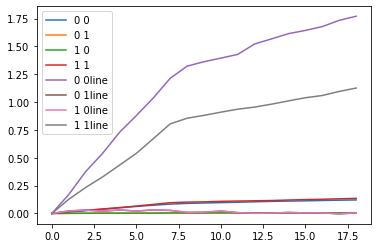

In [150]:
# Plot the change in covariance over time
plt.figure()
for i in range(2):
    for j in range(2):
        # any sim, 50th time step
        plt.plot(covslists[:,50,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[:,50,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()

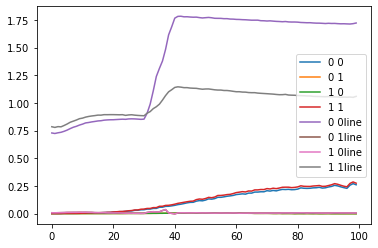

In [151]:
# Plot the final covariance matrices
plt.figure()
for i in range(2):
    for j in range(2):
        # last sim, any time step
        plt.plot(covslists[-1,:,i,j],label=str(i)+" "+str(j))
for i in range(2):
    for j in range(2):
        plt.plot(covslistsline[-1,:,i,j],label=str(i)+" "+str(j)+"line")
plt.legend()
plt.show()

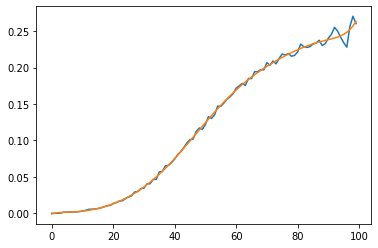

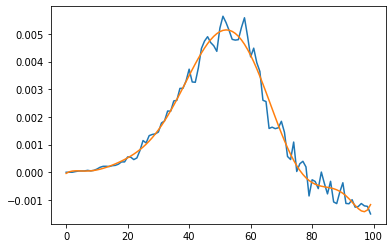

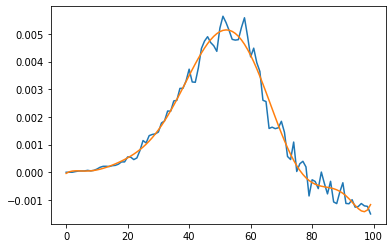

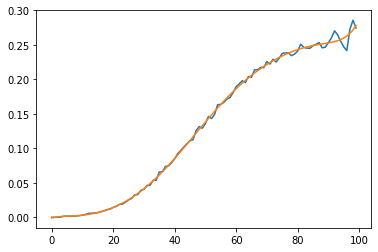

[[[ 1.372e-16 -5.743e-14  9.895e-12 -9.044e-10  4.739e-08 -1.467e-06
    2.739e-05 -2.487e-04  1.203e-03 -8.804e-04]
  [ 2.508e-17 -1.031e-14  1.718e-12 -1.490e-10  7.229e-09 -1.993e-07
    3.086e-06 -2.337e-05  7.782e-05 -4.029e-05]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]]

 [[ 2.508e-17 -1.031e-14  1.718e-12 -1.490e-10  7.229e-09 -1.993e-07
    3.086e-06 -2.337e-05  7.782e-05 -4.029e-05]
  [ 9.190e-17 -3.795e-14  6.468e-12 -5.872e-10  3.095e-08 -1.001e-06
    2.094e-05 -2.098e-04  1.145e-03 -9.065e-04]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]]

 [[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0

In [172]:
degree = 9
vals = np.zeros((3,3,degree+1))
for i in range(2):
    for j in range(2):
        vals[i,j] = np.polyfit(np.arange(0,100),covslists[-1,:,i,j],degree)
        plt.figure()
        plt.plot(covslists[-1,:,i,j])
        pred = np.zeros(100)
        for exp in range(degree+1):
            pred += vals[i,j,degree-exp]*np.arange(0,100)**exp
        plt.plot(np.arange(0,100),pred)
        plt.show()
print(vals)

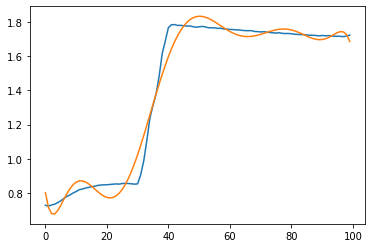

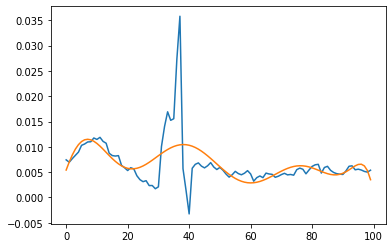

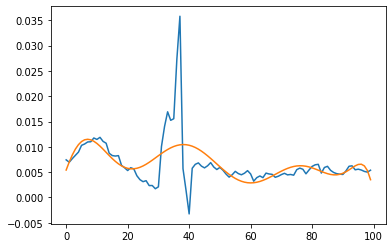

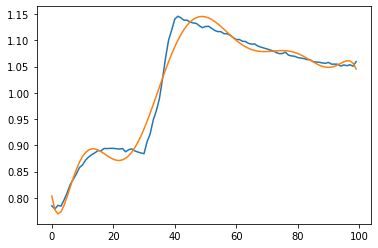

[[[-9.619e-15  4.480e-12 -8.702e-10  9.104e-08 -5.519e-06  1.939e-04
   -3.730e-03  3.495e-02 -1.172e-01  8.013e-01]
  [-1.666e-16  7.138e-14 -1.251e-11  1.147e-09 -5.801e-08  1.532e-06
   -1.596e-05 -5.978e-05  1.664e-03  5.419e-03]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]]

 [[-1.666e-16  7.138e-14 -1.251e-11  1.147e-09 -5.801e-08  1.532e-06
   -1.596e-05 -5.978e-05  1.664e-03  5.419e-03]
  [-3.113e-15  1.459e-12 -2.856e-10  3.017e-08 -1.854e-06  6.636e-05
   -1.311e-03  1.254e-02 -3.736e-02  8.035e-01]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]]

 [[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
    0.000e+00  0.000e+00  0.000e+00  0.000e+00]
  [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0

In [171]:
degree = 9
vals = np.zeros((3,3,degree+1))

for i in range(2):
    for j in range(2):
        vals[i,j] = np.polyfit(np.arange(0,100),covslistsline[-1,:,i,j],degree)
        plt.figure()
        plt.plot(covslistsline[-1,:,i,j])
        pred = np.zeros(100)
        for exp in range(degree+1):
            pred += vals[i,j,degree-exp]*np.arange(0,100)**exp
        plt.plot(np.arange(0,100),pred)
        plt.show()
print(vals)

# Getting Final Data

In [528]:
folder = "./paper10"

calodom0 = np.vstack((np.loadtxt(folder+"/calodom0.csv", delimiter=","))) #, \
#                      np.loadtxt("./final/final"+rep+"_second50/calodom0.csv", delimiter=",")))
#calodom0 = np.delete(calodom0, [451*2,451*2+1,454*2,454*2+1,598*2,598*2+1], axis=0) # papercontrol
#calodom0 = np.delete(calodom0, [191*2,191*2+1],axis=0) # paperrtd
#calodom0 = np.delete(calodom0, [651*2,651*2+1], axis=0) # paper90
#calodom0 = np.delete(calodom0, [193*2, 193*2+1], axis=0) # paper50
calodom0 = np.delete(calodom0, [182*2,182*2+1,551*2,551*2+1], axis=0) # paper10
display(calodom0.shape)

calodom1 = np.vstack((np.loadtxt(folder+"/calodom1.csv", delimiter=","))) #, \
#                      np.loadtxt("./final/final"+rep+"_second50/calodom1.csv", delimiter=",")))
#calodom1 = np.delete(calodom1, [451*2,451*2+1,454*2,454*2+1,598*2,598*2+1], axis=0) # papercontrol
#calodom1 = np.delete(calodom1, [191*2,191*2+1],axis=0) # paperrtd
#calodom1 = np.delete(calodom1, [651*2,651*2+1], axis=0) # paper90
#calodom1 = np.delete(calodom1, [193*2, 193*2+1], axis=0) # paper50
calodom1 = np.delete(calodom1, [182*2,182*2+1,551*2,551*2+1], axis=0) # paper10
display(calodom1.shape)

deets = np.vstack((np.loadtxt(folder+"/simdeets.csv", delimiter=","))) #, \
#                   np.loadtxt("./final/final"+rep+"_second50/simdeets.csv", delimiter=",")))
#deets = np.delete(deets, [26*3,26*3+1,26*3+2], axis=0)
#deets = np.delete(deets, [44*3,44*3+1,44*3+2], axis=0)
#deets = np.delete(deets, [175*3,175*3+1,175*3+2,371*3,371*3+1,371*3+2,638*3,638*3+1,638*3+2], axis=0) # paperrtd
#deets = np.delete(deets, [160*3,160*3+1,160*3+2], axis=0) # paper90
#deets = np.delete(deets, [261*3,261*3+1,261*3+2,724*3,724*3+1,724*3+2], axis=0) # paper50
deets = np.delete(deets, [314*3,314*3+1,314*3+2], axis=0) # paper10
display(deets.shape)

(1500, 1200)

(1500, 1200)

(2250, 6)

In [529]:
# Identify bad data
n_sims = 750
reached = np.zeros((n_sims,))
for sim in range(n_sims):
    goal = deets[sim*3+1,:2]
    reached[sim] = np.sum(np.where(((calodom1[sim*2,:10]-goal[0])**2+(calodom1[sim*2+1,:10]-goal[1])**2)**.5<=.2,1,0))
print("The odom start point matches the actual start point "+str(np.sum(np.where(reached>0,1,0)))+" times out of "+str(n_sims)+".")
print("Fraction:",np.sum(np.where(reached>0,1,0))/n_sims)
print(np.where(reached==0))

The odom start point matches the actual start point 750 times out of 750.
Fraction: 1.0
(array([], dtype=int64),)


### Get times the goal is reached

In [530]:
n_sims = 750
reached = np.zeros((n_sims,))
for sim in range(n_sims):
    goal = deets[sim*3,3:5]
    reached[sim] = np.sum(np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2,1,0))
print("The goal was reached "+str(np.sum(np.where(reached>0,1,0)))+" times out of "+str(n_sims)+".")
print("Fraction:",np.sum(np.where(reached>0,1,0))/n_sims)

The goal was reached 621 times out of 750.
Fraction: 0.828


## Get the number of collisions

In [531]:
n_bots = 2
collided = np.zeros((n_sims,))
for sim in range(n_sims):
    ind0 = np.where(calodom0[sim*2]!=0)
    ind1 = np.where(calodom1[sim*2]!=0)
    ind = min(ind0[0][-1],ind1[0][-1])
    collided[sim] = np.sum(np.where(((calodom0[sim*2,ind]-calodom1[sim*2,ind])**2 + \
                                     (calodom0[sim*2+1,ind]-calodom1[sim*2+1,ind])**2)**.5<=.105,1,0))
print("The robots collided "+str(np.sum(np.where(collided>0,1,0)))+" times out of "+str(n_sims)+".")
print("Fraction:",np.sum(np.where(collided>0,1,0))/n_sims)
print(np.where(collided!=0))

The robots collided 20 times out of 750.
Fraction: 0.02666666666666667
(array([ 27,  73,  84,  96, 188, 222, 348, 356, 358, 395, 406, 445, 484,
       491, 507, 555, 682, 717, 727, 746]),)


## Get average time to reach the goal when reached

In [532]:
tf = np.zeros((n_sims,))
for sim in range(n_sims):
    if reached[sim]>0:
        goal = deets[sim*3,3:5]
        #print(np.sum(np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2,1,0)))
        ind = np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2)
        #print(ind)
        tf[sim] = ind[0][0]*.1
    else:
        tf[sim] = None
print("When the goal was reached, it took an average of "+str(np.nanmean(tf))+" seconds.")

When the goal was reached, it took an average of 15.853945249597423 seconds.


In [522]:
tf

array([ 5.5, 20.6, 22.9, 28.2, 11.5, 21.1,  6.1, 19.6,  8.9,  9.5, 25.2,
       29.6,  4.1, 19.7, 16. ,  4.5, 12.5,  6.6,  nan, 10.3, 17.1,  8.6,
       17.3, 17.9, 11.6, 12.4,  nan, 11. ,  7.5, 14.2,  5.6,  5.3, 20.7,
        nan, 15.2, 23.2, 18.7,  9.6, 13.7,  nan, 15.2, 18.7, 34.5, 37.2,
        nan,  5.4, 20.3,  nan, 13.2, 18.5, 10.5, 20.2, 18.8, 11.1, 10.4,
        nan,  9.6, 23. , 14. ,  nan, 14.7, 12.3,  7.4, 21.1,  nan,  9.8,
        9.9, 10.5, 16.7, 11. , 16.3, 21.7, 18.5, 17.7, 14.8,  9.4,  3.5,
        8.7, 33.6, 19.2,  0. ,  3.2, 12. , 13.4,  7.3, 16.6,  6. , 16.4,
       10.5,  9.2, 22.3, 33.8, 35.9, 12.7, 18.2, 26.1,  4.7,  nan,  2.9,
        8.2, 17.1, 23.4, 12.1,  6.6,  nan, 19.1,  nan, 18.6,  9.4,  7.6,
       17.2, 18.7, 27.8, 30.4,  7.1, 12.9,  nan, 11.4, 26. ,  nan, 13.1,
       17.6, 18.1,  nan, 18.8,  5.5, 19.9, 16.8,  4.1, 21.5, 11.7,  8.2,
       15.2, 21.7, 14.9, 22.7, 27.6, 30. ,  nan, 10.4,  4.4, 14.1,  8.3,
        nan,  4.4, 21.6,  nan,  6.3,  3.8, 27.1, 17

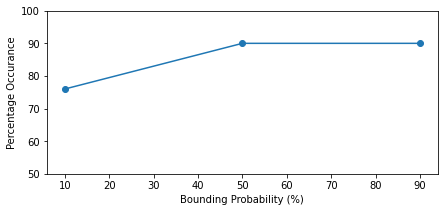

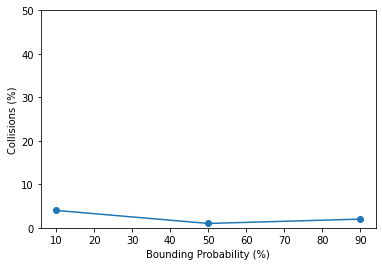

In [523]:
p = [10,50,90]
g = [76,90,90]
c = [4,1,2]
plt.figure(figsize=(7,3))
plt.plot(p,g,label="Goal Reached")
plt.scatter(p,g)
#plt.plot(p,c,label="Collisions")
#plt.scatter(p,c)
plt.xlabel("Bounding Probability (%)")
plt.ylabel("Percentage Occurance")
plt.ylim([50,100])
#plt.legend(loc="center right")
plt.show()

plt.figure()
plt.plot(p,c)
plt.scatter(p,c)
plt.xlabel("Bounding Probability (%)")
plt.ylabel("Collisions (%)")
plt.ylim([0,50])
plt.show()

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


/home/derek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


425
450
475
500
525
550
575
600
625
650
675
698


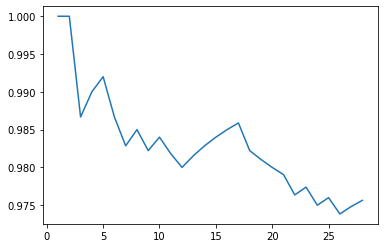

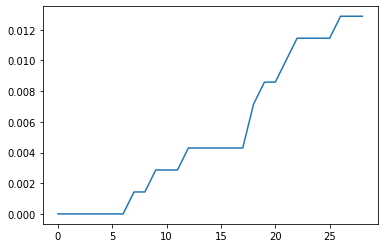

In [414]:
n_sims = 699
fractions = []
col_fracs = []
for i in range(n_sims):
    if i % 25 == 0 or i==n_sims-1:
        print(i)
        # Did the agent reach the goal
        reached = np.zeros((i,))
        for sim in range(i):
            goal = deets[sim*3,3:5]
            reached[sim] = np.sum(np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2,1,0))
        #print("The goal was reached "+str(np.sum(np.where(reached>0,1,0)))+" times out of "+str(n_sims)+".")
        fractions.append(np.sum(np.where(reached>0,1,0))/i)
        
        # Did the agents collide
        collided = np.zeros((i,))
        for sim in range(i):
            ind0 = np.where(calodom0[sim*2]!=0)
            ind1 = np.where(calodom1[sim*2]!=0)
            ind = min(ind0[0][-1],ind1[0][-1])
            collided[sim] = np.sum(np.where(((calodom0[sim*2,ind]-calodom1[sim*2,ind])**2 + \
                                             (calodom0[sim*2+1,ind]-calodom1[sim*2+1,ind])**2)**.5<=.105,1,0))
        #print("The robots collided "+str(np.sum(np.where(collided>0,1,0)))+" times out of "+str(n_sims)+".")
        col_fracs.append(np.sum(np.where(collided>0,1,0))/n_sims)
    
plt.figure()
plt.plot(fractions,label="Goal Reached")
plt.show()
plt.figure()
plt.plot(col_fracs,label="Collisions")
plt.show()

## Calculate Confidence Bounds

In [533]:
z = 1.96 # For 95%
g = .01

n_sims = 750
reached = np.zeros((n_sims,))
for sim in range(n_sims):
    goal = deets[sim*3,3:5]
    reached[sim] = np.sum(np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2,1,0))
sig = np.std(np.where(reached>0,1,0))
print("Goal Reached")
print(z*sig/(n_sims**.5))
print(z**2*sig**2/g**2)

n_bots = 2
collided = np.zeros((n_sims,))
for sim in range(n_sims):
    ind0 = np.where(calodom0[sim*2]!=0)
    ind1 = np.where(calodom1[sim*2]!=0)
    ind = min(ind0[0][-1],ind1[0][-1])
    collided[sim] = np.sum(np.where(((calodom0[sim*2,ind]-calodom1[sim*2,ind])**2 + \
                                     (calodom0[sim*2+1,ind]-calodom1[sim*2+1,ind])**2)**.5<=.105,1,0))
sig = np.std(np.where(collided>0,1,0))
print("Collisions")
print(z*sig/(n_sims**.5))
print(z**2*sig**2/g**2)

tf = np.zeros((n_sims,))
for sim in range(n_sims):
    if reached[sim]>0:
        goal = deets[sim*3,3:5]
        #print(np.sum(np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2,1,0)))
        ind = np.where(((calodom0[sim*2]-goal[0])**2+(calodom0[sim*2+1]-goal[1])**2)**.5<=.2)
        #print(ind)
        tf[sim] = ind[0][0]*.1
    else:
        tf[sim] = None
sig = np.nanstd(tf)
print("Time")
print(z*sig/(n_sims**.5))
print(z**2*sig**2/g**2)

Goal Reached
0.027008771552960345
5471.053055999999
Collisions
0.011530299922217822
997.1086222222224
Time
0.6230665053114842
2911589.025307994
